<a href="https://colab.research.google.com/github/pepemesquita/CNC/blob/main/Relat%C3%B3rio_2_Pedro_Henrique_Lima_de_Mesquita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Relatório 2 - Sistemas de Equações Lineares**
Aluno: Pedro Henrique Lima de Mesquita

Matricula: 20200862


#Imports

In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
import time
import psutil
import math

#Métodos

##Eliminação-Gauss

In [2]:
def gauss(A, b):
    n = len(b)
    matriz_aumentada = np.column_stack((A, b))

    for i in range(n):
        max_linha = i
        for k in range(i+1, n):
            if abs(matriz_aumentada[k, i]) > abs(matriz_aumentada[max_linha, i]):
                max_linha = k
        if max_linha != i:
            matriz_aumentada[[i, max_linha]] = matriz_aumentada[[max_linha, i]]
        for k in range(i+1, n):
            factor = matriz_aumentada[k, i] / matriz_aumentada[i, i]
            matriz_aumentada[k, i:] -= factor * matriz_aumentada[i, i:]
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (matriz_aumentada[i, -1] - np.dot(matriz_aumentada[i, i+1:n], x[i+1:])) / matriz_aumentada[i, i]

    return x

##Decomposição-LU

In [3]:
def decomposicao_lu(n, A, b, epsilon):

    L = np.identity(n)
    U = np.copy(A)
    y = [0] * n

    for k in range(n-1):
        for i in range(k+1, n):
            m = -U[i][k] / U[k][k]
            L[i][k] = -m
            for j in range(k+1, n):
                U[i][j] = m * U[k][j] + U[i][j]
            U[i][k] = 0

    for i in range(n):
        y[i] = b[i]
        for j in range(i):
            y[i] -= L[i][j] * y[j]
        y[i] /= L[i][i]
        y[i] = round(y[i], epsilon)

    LenU = len(U)
    x = [0] * n

    for i in range(LenU - 1, -1, -1):
        x[i] = y[i]
        for j in range(i + 1, LenU):
            x[i] -= U[i][j] * x[j]
        x[i] /= U[i][i]
        x[i] = round(x[i], epsilon)

    return x

##Cholesky

In [4]:
def cholesky(n, A):
    det = 1
    info = 0

    for j in range(n):
        soma = 0

        for k in range(j):
            soma += A[j][k] * A[j][k]

        t = A[j][j] - soma

        if t > 0:
            A[j][j] = math.sqrt(t)
            r = 1 / A[j][j]
            det *= t
        else:
            info = j
            print("Matriz não é definida positiva")
            return None  # Retorna None em caso de falha

        for i in range(j + 1, n):
            soma = 0

            for k in range(j):
                soma += A[i][k] * A[j][k]

            A[i][j] = (A[i][j] - soma) * r

    return A, det, info

##Gauss-Jacobi

In [5]:
def diag_dominante(A):
    n = len(A)
    for i in range(n):
        diag = abs(A[i][i])
        linha_soma = sum(abs(A[i][j]) for j in range(n) if j != i)
        if diag <= linha_soma:
            return False
    return True

def jacobi(n, A, b, epsilon=None, iter_max=None):

    x = [0] * n
    v = [0] * n

    if epsilon is None:
        epsilon = 1e-6
    if iter_max is None:
        iter_max = 1000
    if not diag_dominante(A):
        print("\nMatriz não é diagonalmente dominante")


    iteracao = 0
    info = 1

    while iteracao < iter_max:
        iteracao += 1
        norma_num = 0
        norma_den = 1e-6
        norma_rel = 0

        for i in range(1, n):
            soma = 0

            for j in range(1, n):
                if i != j:
                    soma += A[i][j] * x[j]

            v[i] = (b[i] - soma) / A[i][i]

        for i in range(1, n):
            t = abs(v[i] - x[i])

            if t > norma_num:
                norma_num = t

            if abs(v[i]) > norma_den:
                norma_den = abs(v[i])

            x[i] = v[i]

        norma_rel = norma_num / norma_den

        if norma_rel <= epsilon:
          info = 0
          break


    return x, iteracao, info

#Gauss-Seidel

In [6]:
def diag_dominante(A):
    n = len(A)
    for i in range(n):
        diag = abs(A[i][i])
        linha_soma = sum(abs(A[i][j]) for j in range(n) if j != i)
        if diag <= linha_soma:
            return False
    return True


def seidel(n, A, b, epsilon, iter_max):
    if epsilon is None:
        epsilon = 1e-6
    if iter_max is None:
        iter_max = 1000
    if not diag_dominante(A):
        print("\nMatriz não é diagonalmente dominante")

    info = 0
    iteracao = 0
    x = [0.0] * n
    v = x.copy()

    for i in range(n):
      if A[i][i] != 0:
        x[i] = b[i] / A[i][i]
      else:
        x[i] = 0

    while iteracao < iter_max:
        iteracao += 1
        norma_num = 0.0
        norma_den = 0.0

        for i in range(n):
            soma = 0.0
            for j in range(n):
                if i != j:
                    soma += A[i][j] * x[j]
            v[i] = x[i]
            if A[i][i] != 0:
              x[i] = (b[i] - soma) / A[i][i]
            else:
              x[i] = 0
            t = abs(v[i] - x[i])
            if t > norma_num:
                norma_num = t
            if abs(x[i]) > norma_den:
                norma_den = abs(x[i])

        norma_rel = norma_num / (norma_den + 1e-10)

        if norma_rel <= epsilon:
            break

    if norma_rel <= epsilon:
        info = 0
    else:
        info = 1
    return x, iteracao, info

#Questão 1
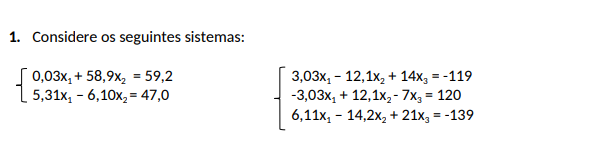

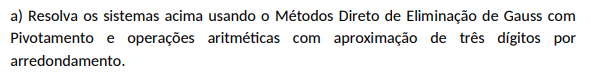

In [7]:
#Sistema 1
A = [[0.03, 58.9],
     [5.31, -6.10]]

b = [59.2, 47.0]

result = gauss(A, b)
print("Resultados do Sistema 1")
print(result)

Resultados do Sistema 1
[10.  1.]


In [8]:
#Sistema 2
A = [[3.03, -12.1, 14],
     [-3.03, 12.1, -7],
     [6.11, -14.2, 21]]

b = [-119, 120, -139]

result = gauss(A, b)
print("Resultados do Sistema 1")
print(result)

Resultados do Sistema 1
[ 0.         10.          0.14285714]


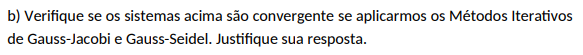

In [9]:
n = 2
A = [[0.03, 58.9],
     [5.31, -6.10]]

b = [59.2, 47.0]

print("Resultados para o sistema 1\n")

print("Método Gauss-Jacobi")
resultado, iteracoes, status = jacobi(n, A, b, None, 100)

print(f"Resultado:{resultado}")
print(f"Número de iterações:{iteracoes}")
print("Status:", "Convergiu\n" if status == 0 else "Não convergiu")

print("Método Gauss-Seidel")
resultado, iteracoes, status = seidel(n, A, b, None, 100)

print(f"Resultado:{resultado}")
print(f"Número de iterações:{iteracoes}")
print("Status:", "Convergiu\n" if status == 0 else "Não convergiu")


Resultados para o sistema 1

Método Gauss-Jacobi

Matriz não é diagonalmente dominante
Resultado:[0, -7.704918032786885]
Número de iterações:2
Status: Convergiu

Método Gauss-Seidel

Matriz não é diagonalmente dominante
Resultado:[-inf, -inf]
Número de iterações:100
Status: Não convergiu


In [10]:
n = 3
A = [[3.03, -12.1, 14],
     [-3.03, 12.1, -7],
     [6.11, -14.2, 21]]

b = [-119, 120, -139]

print("Resultados para o sistema 2\n")

print("Método Gauss-Jacobi")
resultado, iteracoes, status = jacobi(n, A, b, None, None)

print(f"Resultado:{resultado}")
print(f"Número de iterações:{iteracoes}")
print("Status:", "Convergiu\n" if status == 0 else "Não convergiu")

print("Método Gauss-Seidel")
resultado, iteracoes, status = seidel(n, A, b, None, None)

print(f"Resultado:{resultado}")
print(f"Número de iterações:{iteracoes}")
print("Status:", "Convergiu\n" if status == 0 else "Não convergiu")


Resultados para o sistema 2

Método Gauss-Jacobi

Matriz não é diagonalmente dominante
Resultado:[0, 9.999999936475623, 0.1428519453530509]
Número de iterações:31
Status: Convergiu

Método Gauss-Seidel

Matriz não é diagonalmente dominante
Resultado:[2.825511679902992e+179, 5.293998275968246e+178, -4.641142291586845e+178]
Número de iterações:1000
Status: Não convergiu


##Justificativa para ambos os sistemas



> A convergência do método Jacobi pode ser atribuída à sua natureza de atualização independente, que pode evitar certos problemas de convergência que podem ocorrer no método Gauss-Seidel.
Só que a falta de convergência do método Gauss-Seidel pode ser devido a um problema conhecido como "condição ruim" ou "condição de Gershgorin", em que se o valor máximo absoluto de um elemento na matriz é muito maior do que o valor máximo absoluto dos outros elementos na mesma linha, o método Gauss-Seidel pode não convergir, e ocorre porque o método Gauss-Seidel tem uma convergência garantida apenas se a matriz for "suavizada", o que significa que todos os seus valores absolutos são menores ou iguais a 1. Só que o valor máximo absoluto na matriz A é 58.9 do sistema 1 e do sistema 2 é 21, que é muito maior do que os outros valores na mesma linha e talvez por isso que a matriz A não seja "suavizada", o que pode explicar a falta de convergência do método Gauss-Seidel. E a matriz não é estritamente diagonalmente dominante, cada linha o valor absoluto do elemento diagonal é menor que a soma dos valores absolutos dos outros elementos. Portanto, não é garantido que os métodos de Jacobi e Gauss-Seidel convergirão para esta matriz. Mas ainda assim os métodos de Jacobi e Gauss-Seidel podem convergir para certas matrizes que não são diagonalmente dominantes como foi o caso do Jacobi para os 2 sistemas, mas pode depender de outros fatores também, como a escolha do vetor inicial para as iterações. Ou talvez possa ser algum erro por minha parte também já que removi a verificação de convergência caso não seja diagonalmente determinante para analisar os resultados mesmo assim.




#Questão 2


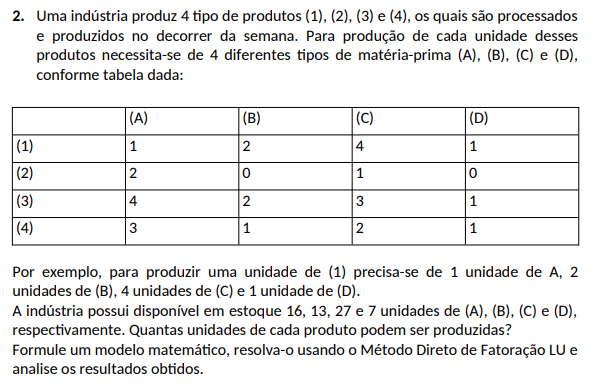



> Organizando esse sistema 4x4 seguindo a linha do texto temos a equação sendo representada dessa maneira:



\begin{cases}
  1x_1 + 2x_2 + 4x_3 + 3x_4 = 16 \\
  2x_1 + 0x_2 + 2x_3 + 1x_4 = 13 \\
  4x_1 + 1x_2 + 3x_3 + 2x_4 = 27 \\
  1x_1 + 0x_2 + 1x_3 + 1x_4 = 7 \\
\end{cases}



> Em seguida, podemos organizar essas equações em uma matriz de coeficientes
A e um vetor de termos independentes b, resultando em:


In [11]:
A = [[1., 2., 4., 3.],
     [2., 0., 2., 1.],
     [4., 1., 3., 2.],
     [1., 0., 1., 1.]]

b = [16., 13., 27., 7.]



> Ao resolver esse sistema de equações utilizando um método como decomposição LU, obtemos os valores para X1, X2, X3 e X4. Substituindo esses valores de volta no sistema original, verificamos a validade da solução.





In [12]:
result = decomposicao_lu(4, A, b, 3)
print(result)

[5.0, 2.0, 1.0, 1.0]




> Esta abordagem é aplicada aqui, resultando em uma solução coerente, onde todos os resultados são inteiros. Portanto, o modelo matemático é consistente com os dados fornecidos



#Questão 3

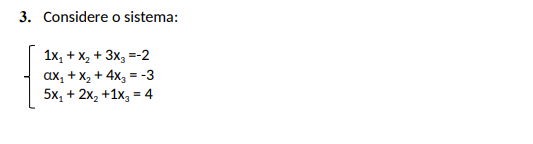

### a) A matriz A pode ser decomposta em L.U? Justifique.




> A matriz em consideração não deve ser singular, o que significa que seu determinante deve ser distinto de zero. Uma matriz singular não possui uma matriz inversa, e a decomposição LU pressupõe a existência dessa matriz inversa e levando isso em consideração, para que a matriz em questão seja passível de decomposição, a condição necessária é que o valor de 1 - a seja igual a 0, condição fundamental para assegurar que a matriz tenha uma decomposição LU válida.



### b) O sistema pode ser resolvido por Fatoração Cholesky? Justifique.



> Para aplicarmos a fatoração de Cholesky a uma matriz, é de praxe que a matriz seja simétrica e definida positiva, o que implica que todas as suas submatrizes tenham determinantes positivos, essa não atende esse critério!



###c) Considere α = 1 e resolva o sistema pelo Método de Eliminação de Gauss.

In [13]:
A = [[1., 1., 3.], [1., 1., 4.], [5., 2., 1.]]
b = [-2., -3., 4.]

result = gauss(A, b)
print("Resultados do Sistema 1")
print(result)

Resultados do Sistema 1
[ 1.  0. -1.]


#Questão 4

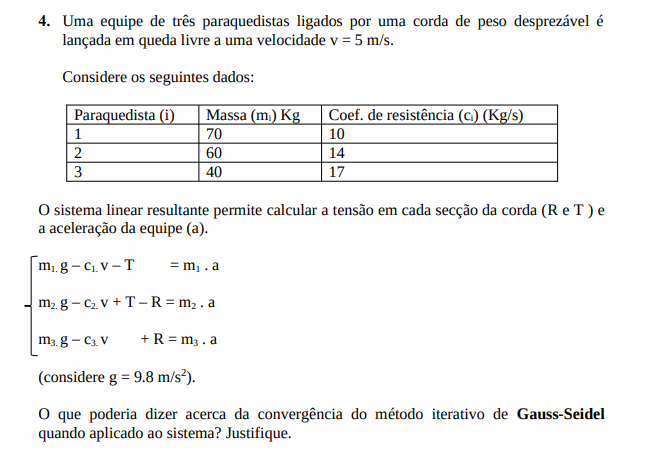

In [14]:
A = [[-70, -1, 0],
     [-1, -60, 1],
     [1, -40, 0]]
b = [-636, -518, -307]

n = 3
epsilon = 0.05
iter_max = 100

x, iteracoes, info = seidel(n, A, b, epsilon, iter_max)

if info == 0:
    print("Resultado:")
    for i, x_i in enumerate(x):
        print(f"x{i + 1} = {x_i}")

    print(f"Interações: {iteracoes}")


Matriz não é diagonalmente dominante
Resultado:
x1 = 8.962380952380952
x2 = 8.483960317460317
x3 = 0
Interações: 1



##Explicação:


> Visto que as condições de convergência estabelecidas para a aplicação do método de Gauss-Seidel não foram satisfeitas pela matriz em consideração, percebe-se que a cnvergência neste contexto demandava que a matriz apresentasse características de diagonal dominância. Já que a diagonal dominância de uma matriz é verificada quando esta atende, no mínimo, aos critérios estabelecidos para as linhas quanto colunas. O critério das linhas é satisfeito quando a soma dos valores absolutos de cada linha possui, no mínimo, o valor máximo entre todas as linhas da matriz. Analogamente, o critério das colunas requer que a soma dos valores absolutos de cada coluna seja, no mínimo, igual ao valor máximo obtido entre todas as colunas da matriz.



#Questão 5

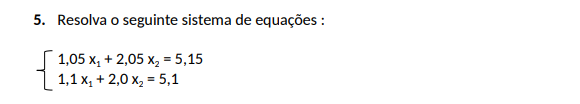

### a) Graficamente

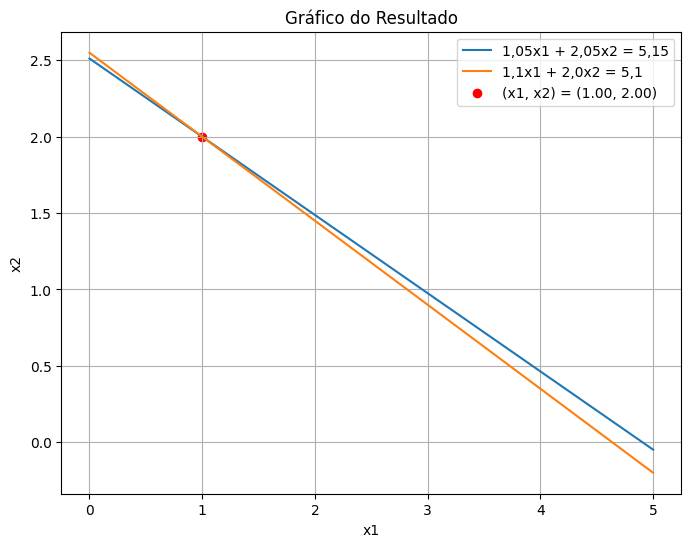

In [15]:
  A = np.array([[1.05, 2.05],
                [1.1, 2.0]])
  b = np.array([5.15, 5.1])

  x = np.linalg.solve(A, b)
  x1, x2 = x

  x = np.linspace(0, 5, 100)
  eq1 = (5.15 - 1.05 * x) / 2.05
  eq2 = (5.1 - 1.1 * x) / 2.0

  plt.figure(figsize=(8, 6))
  plt.plot(x, eq1, label='1,05x1 + 2,05x2 = 5,15')
  plt.plot(x, eq2, label='1,1x1 + 2,0x2 = 5,1')
  plt.scatter(x1, x2, color='red', label=f'(x1, x2) = ({x1:.2f}, {x2:.2f})')
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.legend()
  plt.grid(True)
  plt.title('Gráfico do Resultado')
  plt.show()

### b) Por Eliminação de Gauss com Pivotamento Parcial, de modo exato.

In [16]:
A = [[1.05, 2.05],
     [1.1, 2.0]]

b = [5.15, 5.1]


result = gauss(A, b)
np.set_printoptions(precision=1000)
print(result)

[0.9999999999999827 2.0000000000000093]


###c) Por Eliminação de Gauss com Pivotamento Parcial, mas com três algarismos significativos, utilizando arredondamento.



In [17]:
A = [[1.05, 2.05],
     [1.1, 2.0]]

b = [5.15, 5.1]


result = gauss(A, b)
np.round(result, decimals=3)


array([1., 2.])

##d) Justificativa



> O resultado obtido na b) é exato, enquanto que o resultado obtido na c) é aproximado, porque o arredondamento induz erros na matriz triangular superior U. O erro relativo é dado por (U - U’)/U, onde U é a matriz triangular superior exata e U’ é a matriz triangular superior aproximada.
O erro relativo é proporcional ao número de algarismos significativos utilizados no arredondamento e como foi utilizados três algarismos significativos, o erro relativo é da ordem de 10^-3.
